In [20]:
import os
import numpy as np
#import h5py
#from fuel.converters.base import fill_hdf5_file
from scipy.io import loadmat
from os import listdir
from os.path import isfile, join
from PIL import Image
import shutil
from argparse import ArgumentParser
import matplotlib.pyplot as plt
import pickle

In [4]:
train_features = []
train_locations = []
train_labels = []
test_features = []
test_locations = []
test_labels = []
for f in listdir('images'):
    if isfile(join('images', f)):
        number, label, x, y = f.split('.')[0].split('_')
        location = np.array((0.28, 0, (int(x) + 14.0 - 50.0) / 50.0, 0, 0.28, (int(y) + 14.0 - 50.0) / 50.0), ndmin=1, dtype=np.float32)
        image = np.array(Image.open(join('images', f)), ndmin=3, dtype=np.uint8)
        label = int(label)
        if int(number) <= 60000:
            train_features.append(image)
            train_locations.append(location)
            train_labels.append(label)
        else:
            test_features.append(image)
            test_locations.append(location)
            test_labels.append(label)

# h5file = h5py.File(path, mode='w')

# data = (
#         ('train', 'features', np.array(train_features)),
#         ('test', 'features', np.array(test_features)),
#         ('train', 'locations', np.array(train_locations)),
#         ('test', 'locations', np.array(test_locations)),
#         ('train', 'labels', np.array(train_labels, dtype=np.uint8)),
#         ('test', 'labels', np.array(test_labels, dtype=np.uint8)),
# )
# fill_hdf5_file(h5file, data)
# for i, label in enumerate(('batch', 'channel', 'height', 'width')):
#     h5file['features'].dims[i].label = label
# for i, label in enumerate(('batch', 'index')):
#     h5file['locations'].dims[i].label = label
# for i, label in enumerate(('batch',)):
#     h5file['labels'].dims[i].label = label

# h5file.flush()
# h5file.close()

# shutil.rmtree('images')

In [5]:
train_features = np.array(train_features)
test_features = np.array(test_features)
train_labels = np.array(train_labels, dtype=np.uint8)
test_labels = np.array(test_labels, dtype=np.uint8)

In [9]:
train_features = train_features.reshape(-1, 100, 100, 1)
test_features = test_features.reshape(-1, 100, 100, 1)

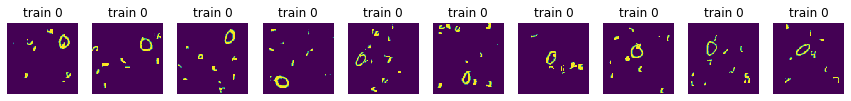

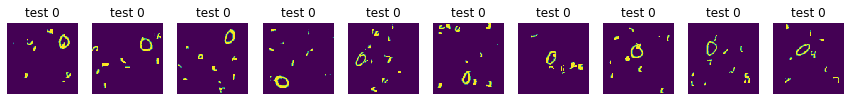

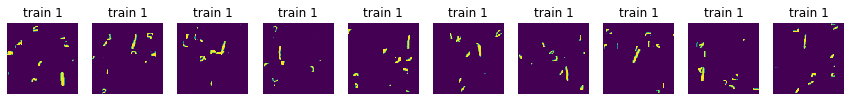

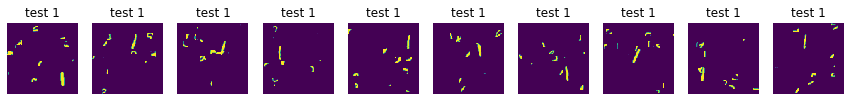

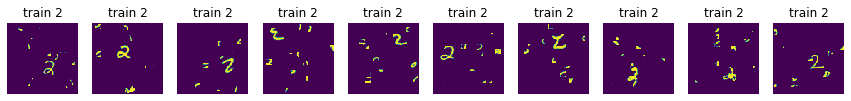

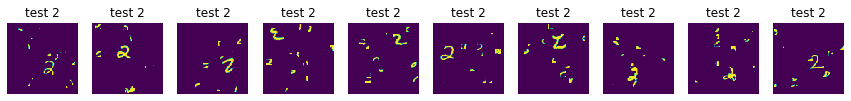

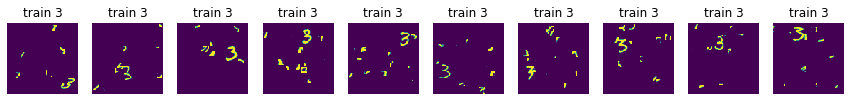

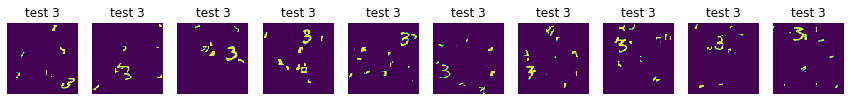

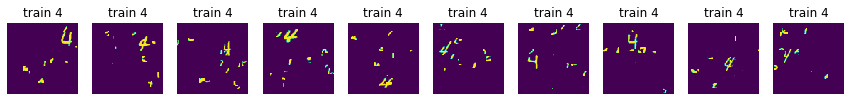

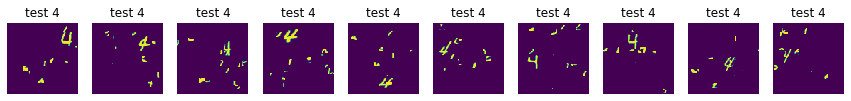

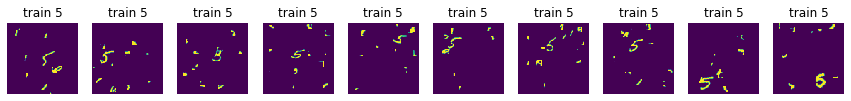

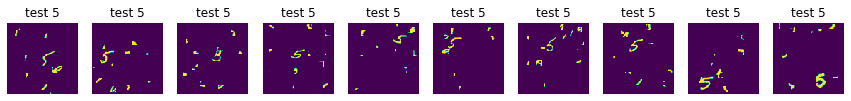

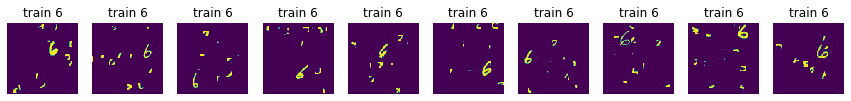

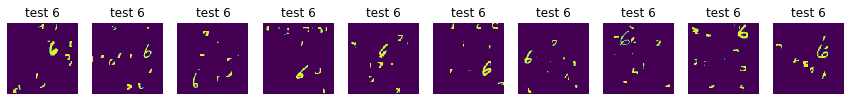

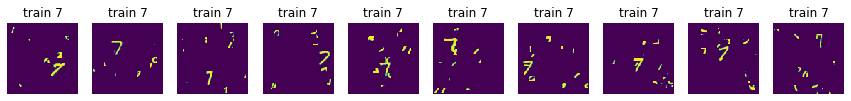

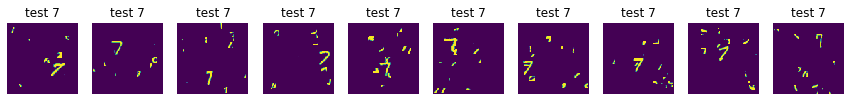

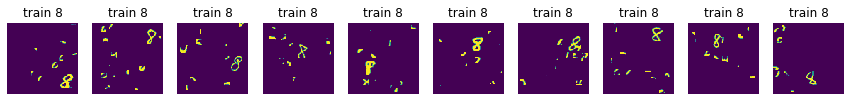

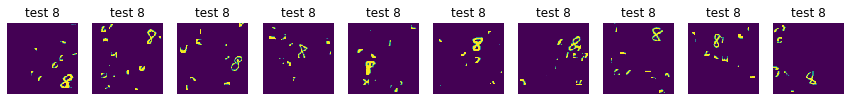

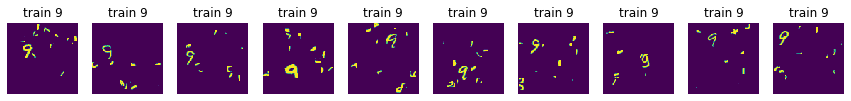

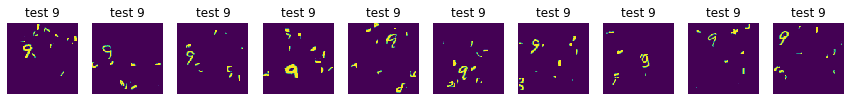

In [17]:
for y_i in np.unique(train_labels):
    repeats = 10
    
    x_train_subset = train_features[train_labels == y_i]
    x_test_subset = test_features[test_labels == y_i]
    
    plt.figure(figsize=(15,5))
    for r in range(repeats):
        plt.subplot(1, 10, r+1)
        plt.title('train {}'.format(y_i))
        plt.imshow(x_train_subset[r][...,0])
        plt.axis('off')
    plt.show()
    
    plt.figure(figsize=(15,5))
    for r in range(repeats):
        plt.subplot(1, 10, r+1)
        plt.title('test {}'.format(y_i))
        plt.imshow(x_train_subset[r][...,0])
        plt.axis('off')
    plt.show()

In [19]:
np.min(train_features), np.max(train_features)

(0, 255)

In [21]:
pickle.dump(train_features, open('x_train.p', 'wb'))
pickle.dump(test_features, open('x_test.p', 'wb'))
pickle.dump(train_labels, open('y_train.p', 'wb'))
pickle.dump(test_labels, open('y_test.p', 'wb'))